<a href="https://colab.research.google.com/github/zoehendershot/DS-1002/blob/main/HW_9_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving ftx-2021-01-01--2023-12-31 (1).csv to ftx-2021-01-01--2023-12-31 (1).csv


In [3]:
df = pd.read_csv('ftx-2021-01-01--2023-12-31 (1).csv')

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [4]:
df.shape

(741, 1)

## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [5]:
# Load your data into a pandas DataFrame with the correct delimiter
df = pd.read_csv('ftx-2021-01-01--2023-12-31 (1).csv', delimiter=';')

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')

In [9]:
df.dropna(inplace=True)  # This will drop rows with any empty values
df.drop_duplicates(inplace=True)
drop_columns = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap']
df.drop(columns=drop_columns, inplace=True)
df.to_csv('ftx-2021-01-01--2023-12-31 (1).csv', index=False)

Now display the first 10 rows of the cleaned dataset.

In [10]:
print(df.head(10))

         open       high       low     close        volume  \
740  6.201133   7.007523  6.171834  6.923968  3.104665e+07   
738  6.948680   7.632146  6.358218  7.514079  4.052611e+07   
737  7.528216   8.714947  7.081120  8.664688  4.947928e+07   
736  8.671285   9.390797  8.425946  9.390797  3.140463e+07   
735  9.386493  10.004872  9.215244  9.562131  4.630334e+07   
734  9.569239   9.726429  8.452265  9.380988  4.228627e+07   
733  9.370450   9.636120  8.728044  9.570511  2.849895e+07   
732  9.571917   9.944797  8.657147  9.308809  3.101239e+07   
731  9.298315   9.298315  7.126050  8.610997  1.013024e+08   
730  8.615143   9.097479  8.040916  8.381133  2.674536e+07   

                           timestamp  
740 2021-01-03 23:59:59.999000+00:00  
738 2021-01-04 23:59:59.999000+00:00  
737 2021-01-05 23:59:59.999000+00:00  
736 2021-01-06 23:59:59.999000+00:00  
735 2021-01-07 23:59:59.999000+00:00  
734 2021-01-08 23:59:59.999000+00:00  
733 2021-01-09 23:59:59.999000+00:00  
732 2

## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [11]:
df['close_change'] = df['close'].diff()
print(df.head(10))

         open       high       low     close        volume  \
740  6.201133   7.007523  6.171834  6.923968  3.104665e+07   
738  6.948680   7.632146  6.358218  7.514079  4.052611e+07   
737  7.528216   8.714947  7.081120  8.664688  4.947928e+07   
736  8.671285   9.390797  8.425946  9.390797  3.140463e+07   
735  9.386493  10.004872  9.215244  9.562131  4.630334e+07   
734  9.569239   9.726429  8.452265  9.380988  4.228627e+07   
733  9.370450   9.636120  8.728044  9.570511  2.849895e+07   
732  9.571917   9.944797  8.657147  9.308809  3.101239e+07   
731  9.298315   9.298315  7.126050  8.610997  1.013024e+08   
730  8.615143   9.097479  8.040916  8.381133  2.674536e+07   

                           timestamp  close_change  
740 2021-01-03 23:59:59.999000+00:00           NaN  
738 2021-01-04 23:59:59.999000+00:00      0.590111  
737 2021-01-05 23:59:59.999000+00:00      1.150608  
736 2021-01-06 23:59:59.999000+00:00      0.726110  
735 2021-01-07 23:59:59.999000+00:00      0.171334  

## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [12]:
positive_growth = df[df['close_change'] > 0]
top_10_positive_growth = positive_growth.nlargest(10, 'close_change')
print(top_10_positive_growth[['close_change', 'timestamp']])

     close_change                        timestamp
492     16.677156 2021-09-01 23:59:59.999000+00:00
487      9.800320 2021-09-06 23:59:59.999000+00:00
692      8.335900 2021-02-19 23:59:59.999000+00:00
592      6.333923 2021-05-24 23:59:59.999000+00:00
674      5.529699 2021-03-09 23:59:59.999000+00:00
515      5.325192 2021-08-09 23:59:59.999000+00:00
485      5.239728 2021-09-08 23:59:59.999000+00:00
625      4.504385 2021-04-26 23:59:59.999000+00:00
611      4.488174 2021-05-05 23:59:59.999000+00:00
311      4.401841 2022-02-28 23:59:59.999000+00:00


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [13]:
df['rate_change'] = df['close'].pct_change()
print(df.head(10))

         open       high       low     close        volume  \
740  6.201133   7.007523  6.171834  6.923968  3.104665e+07   
738  6.948680   7.632146  6.358218  7.514079  4.052611e+07   
737  7.528216   8.714947  7.081120  8.664688  4.947928e+07   
736  8.671285   9.390797  8.425946  9.390797  3.140463e+07   
735  9.386493  10.004872  9.215244  9.562131  4.630334e+07   
734  9.569239   9.726429  8.452265  9.380988  4.228627e+07   
733  9.370450   9.636120  8.728044  9.570511  2.849895e+07   
732  9.571917   9.944797  8.657147  9.308809  3.101239e+07   
731  9.298315   9.298315  7.126050  8.610997  1.013024e+08   
730  8.615143   9.097479  8.040916  8.381133  2.674536e+07   

                           timestamp  close_change  rate_change  
740 2021-01-03 23:59:59.999000+00:00           NaN          NaN  
738 2021-01-04 23:59:59.999000+00:00      0.590111     0.085227  
737 2021-01-05 23:59:59.999000+00:00      1.150608     0.153127  
736 2021-01-06 23:59:59.999000+00:00      0.726110   

## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [14]:
positive_growth = df[df['rate_change'] > 0]
top_5_positive_growth = positive_growth.nlargest(5, 'rate_change')
print(top_5_positive_growth[['rate_change', 'timestamp']])

negative_growth = df[df['rate_change'] < 0]
top_5_negative_growth = negative_growth.nsmallest(5, 'rate_change')
print(top_5_negative_growth[['rate_change', 'timestamp']])

     rate_change                        timestamp
53      0.528686 2022-11-10 23:59:59.999000+00:00
492     0.343825 2021-09-01 23:59:59.999000+00:00
692     0.317665 2021-02-19 23:59:59.999000+00:00
24      0.246848 2022-12-09 23:59:59.999000+00:00
48      0.244886 2022-11-15 23:59:59.999000+00:00
     rate_change                        timestamp
55     -0.750752 2022-11-08 23:59:59.999000+00:00
54     -0.583137 2022-11-09 23:59:59.999000+00:00
50     -0.287059 2022-11-13 23:59:59.999000+00:00
597    -0.275101 2021-05-19 23:59:59.999000+00:00
52     -0.263444 2022-11-11 23:59:59.999000+00:00


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

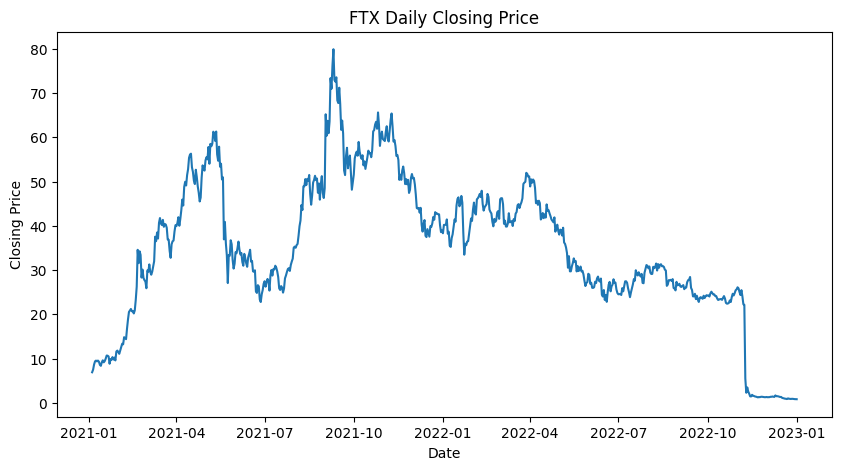

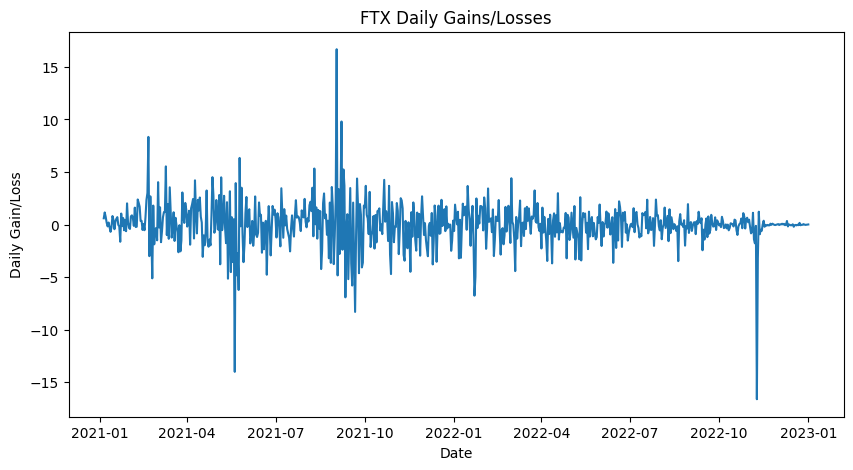

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['close'])
plt.title('FTX Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['close_change'])
plt.title('FTX Daily Gains/Losses')
plt.xlabel('Date')
plt.ylabel('Daily Gain/Loss')
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

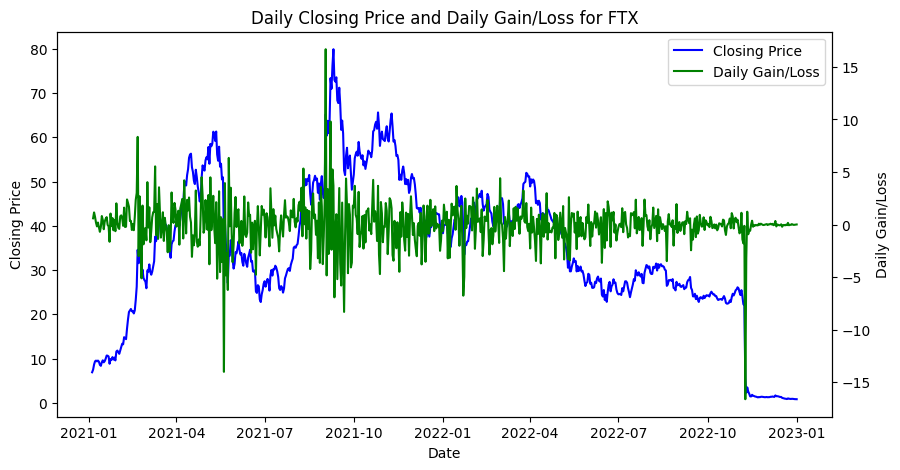

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(df['timestamp'], df['close'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')

ax2 = ax1.twinx()
ax2.plot(df['timestamp'], df['close_change'], color='green', label='Daily Gain/Loss')
ax2.set_ylabel('Daily Gain/Loss')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.title('Daily Closing Price and Daily Gain/Loss for FTX')

plt.show()